<a list of 45 text.Text objects>

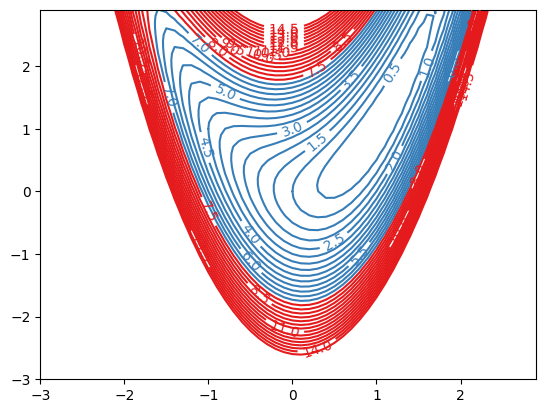

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

eps=0.0001
nu=0.025
itf=0
itd=0
alif=1
omega=0.1
kappa0=0.5

from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 2*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)


In [ ]:

def roz(x):
    return alif*(x[0]**2-x[1])**2+(x[0]-1)**2

def gold(epsg,point,antigr):
    global itf
    a=5
    b=-5
    delt=(b-a)*(math.sqrt(5)-2)/2
    x1=(a+b)/2 -delt
    x2=(a+b)/2 +delt
    f1=roz(point + x1 * antigr)
    f2=roz(point + x2 * antigr)
    while(math.fabs(b-a)>=epsg):
        itf+=1
        if(f1<f2):
            b=x2
            f2=f1
            x1=(a+b)/2 -delt
            x2=(a+b)/2 +delt
            f1=roz(point + x1 * antigr)
        else:
            a=x1
            f1=f2
            x1=(a+b)/2 -delt
            x2=(a+b)/2 +delt
            f2=roz(point + x2 * antigr)
        delt=(b-a)*(math.sqrt(5)-2)/2
    return (a+b)/2

def antigrad(x):
    antigr=np.array([-alif*4*x[0]*(x[0]**2-x[1])+2*(x[0]-1), alif*2*(x[0]**2-x[1])])
    return antigr

def norm(x):
    nor=0
    for i in range(len(x)):
        nor +=x[i]*x[i]
    return math.sqrt(nor)

def fastest(x0):
    global itf
    global fans
    global cap
    global ant
    global log
    ans=[np.array(x0)]
    x=np.array([0,0])
    while(norm(antigrad(x0))>eps):
        kappa=gold(eps,x0,antigrad(x0))
        x = x0 + kappa * antigrad(x0)
        ant.append(norm(antigrad(x0)))
        x0=x
        itf+=1
        ans.append(x)
        fans.append(roz(x))
        cap.append(kappa)
        log.append(math.log(norm(antigrad(x0))))
    return ans[0:-1]

def drob(x0):
    global itd
    global fans2, cap2, ant2, log2

    ans=[]
    kappa=kappa0
    f1=roz(x0)
    x=np.array([0.0,0.0])
    i=0
    while(norm(antigrad(x0))>eps):
        x = x0 + kappa * antigrad(x0)
        f1=roz(x0)
        f2=roz(x)
        ant=antigrad(x0)
        ant2.append(norm(antigrad(x0)))
        log2.append(math.log(norm(antigrad(x0))))
        j=1
        itd+=2
        while(((f1-f2) < omega*kappa*(norm(ant))**2)and(kappa*norm(ant)>0.000001)):
            #kappa=1/((itd+1)**(6/10))
            kappa = nu * kappa
            x = x0 + kappa*ant
            f2=roz(x)
            itd+=1
            j+=1
            if(j>100000):
              break
        cap2.append(kappa)
        kappa=kappa0
        x0=x
        f1=f2
        i+=1
        ans.append(x)
        fans2.append(roz(x))
        if(i>100000):
          break
    return ans

x0=np.array([-1,-2])
cap=[]
ant=[]
fans=[]
cap2=[]
ant2=[]
fans2=[]
log=[]
log2=[]
unsv1=fastest(x0)
print( unsv1[-1])
print(itf)
unsv2=drob(x0)
print(unsv2[-1])
print(itd)



[0.99997557 0.99993645]
4989574
[0.94002631 0.90705377]
299931


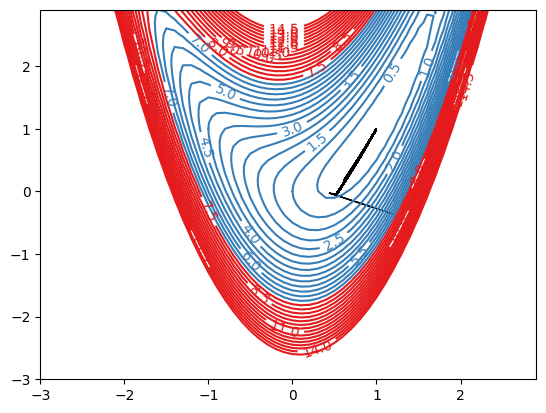

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(2,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

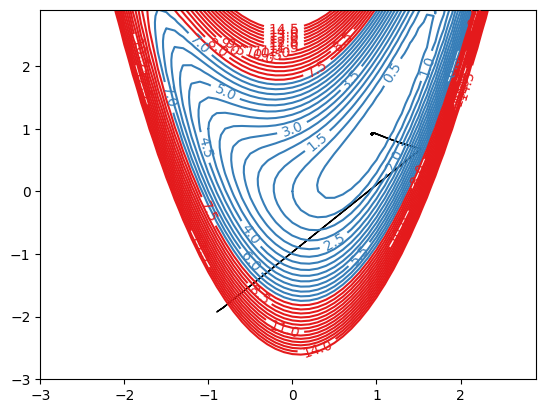

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

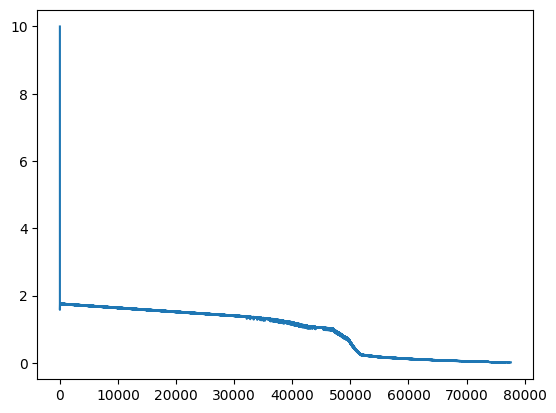

In [ ]:
k=np.arange(0,len(ant),1)
plt.plot(k,ant)
#plt.scatter(np.log(k),log ,color = 'y')
plt.show()


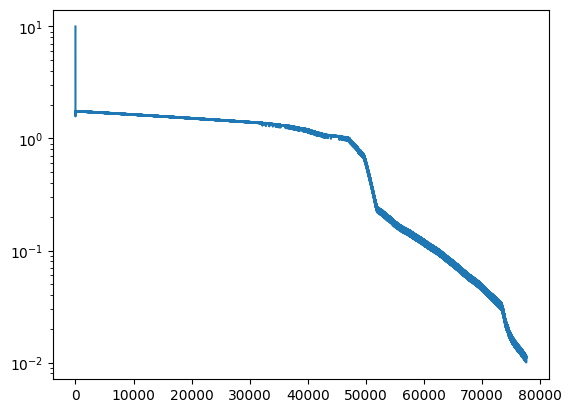

In [ ]:
plt.semilogy(k,ant)
#plt.scatter(k,np.log(ant),s = 1, color = 'y')
plt.show()

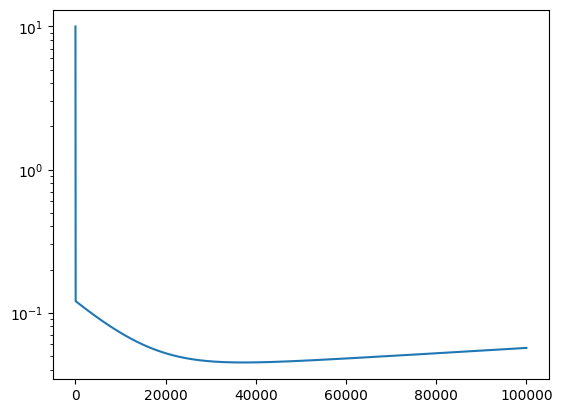

In [ ]:
k2=np.arange(0,len(ant2),1)
#plt.plot(k2,ant2)
plt.semilogy(k2,ant2)

plt.show()

In [ ]:
(len(unsv2),len(fans2),len(cap2),len(ant2))

(100001, 100001, 100001, 100001)

In [ ]:
pd.DataFrame({"xk":unsv1,"F(xk)":fans,"Kappa":cap,"Norma_Antigrad":ant})

,xk,F(xk),Kappa,Norma_Antigrad
0,"[-1, -2]",3.177459,0.273663,10.000000
1,"[1.1893019359592945, -0.35802354803052916]",0.362396,0.092949,8.799048
2,"[0.4407475510234615, -0.028525505496540426]",0.333570,-0.060567,1.575586
3,"[0.53228107057658, -0.05551232482668719]",0.333378,0.007571,1.790091
4,"[0.5197368127352947, -0.05038161047282182]",0.333272,-0.002383,1.748579
...,...,...,...,...
95,"[0.52000177125661, -0.04806152883710789]",0.331689,-0.002383,1.742947
96,"[0.5238685094731022, -0.04957954236054851]",0.331757,0.001628,1.755242
97,"[0.5212132355049377, -0.048524689368249385]",0.331670,-0.002165,1.746737
98,"[0.524731422458115, -0.049911026604289754]",0.331720,0.001628,1.758003


In [ ]:
pd.DataFrame({"xk":unsv2,"F(xk)":fans2,"Kappa":cap2,"Norma_Antigrad":ant2})

,xk,F(xk),Kappa,Norma_Antigrad
0,"[-0.9, -1.925]",11.090225,0.012500,10.000000
1,"[-0.824425, -1.856625]",9.761352,0.012500,8.153221
2,"[1.5331308612135313, 0.679676580625]",3.075847,0.500000,6.925574
3,"[1.4183803337011893, 0.7214469220495087]",1.840060,0.012500,9.769322
4,"[1.3373290740601864, 0.7537058182740284]",1.184484,0.012500,6.978799
...,...,...,...,...
99996,"[0.9400273084539622, 0.907055236133355]",0.004144,0.000008,0.056669
99997,"[0.9400270588900596, 0.9070548704474879]",0.004145,0.000008,0.056669
99998,"[0.9400268093251156, 0.9070545047600035]",0.004145,0.000008,0.056669
99999,"[0.9400265597591303, 0.9070541390709018]",0.004145,0.000008,0.056670
